The goal of this program challenge is to predict the probability of customers churn on one of BCG clients called PowerCo. PowerCo is a company that focus on supplying gas and electricity for SME( Small Medium Enterprises) and residential customers. They want to derive an effective decision to the declining customers lately by collaboration with BCG.
**One hypothesis that likely to happen of the customers churn during period of January to March 2016 is the price sensitiviy and the issue of power-liberalization market in Europe.** We, as consultant want to understand the data better and derive actionable insights through the hypothesis whether ** **bold text**we should consider marketing strategy that PowerCo is trying to do by offering 20% discount to the customers churn.** **Is it an effective way to do or any other solutions that we can deliver to the client?.** Because this is a classification problem, we will be using one or more classification algorithms such as Logistic Regression, Decision tree, or Random Forest by always checking a few importants parts such as overfitting or underfitting model.

For these reasons, We will analyze three datasets that we will believe can support the insights by following data :

Historical customer data: Customer data such as usage, sign up date, forecasted usage etc Historical pricing data: variable and fixed pricing data etc Churn indicator: whether each customer has churned or not We start the exploratory data analysis by loading the dataset using pandas, checking missing values, doing feature engineering,checking outliers and comparing between univariate and bivariate features,improving the model using ML Algorithms(Logistics regression, Decision Tree, Random Forest or Gradient Boosting) as classificication model. However, before diving into building model, we will be building exploratory data analysis for the first project.

File descriptions

ml_case_training_data.csv - the training set (contains 16096 records) ml_case_training_hist_data.csv - the testing set (contains 193002 records) ml_case_training_output.csv - a sample of output whether the clients churned or not Data fields

id contact id activity_new category of the company's activity campaign_disc_ele code of the electricity campaign the customer last subscribed to channel_sales code of the sales channel cons_12m electricity consumption of the past 12 months cons_gas_12m gas consumption of the past 12 months cons_last_month electricity consumption of the last month date_activ date of activation of the contract date_end registered date of the end of the contract date_first_activ date of first contract of the client date_modif_prod date of last modification of the product date_renewal date of the next contract renewal forecast_base_bill_ele forecasted electricity bill baseline for next month forecast_base_bill_year forecasted electricity bill baseline for calendar year forecast_bill_12m forecasted electricity bill baseline for 12 months forecast_cons forecasted electricity consumption for next month forecast_cons_12m forecasted electricity consumption for next 12 months forecast_cons_year forecasted electricity consumption for next calendar year forecast_discount_energy forecasted value of current discount forecast_meter_rent_12m forecasted bill of meter rental for the next 12 months forecast_price_energy_p1 forecasted energy price for 1st period forecast_price_energy_p2 forecasted energy price for 2nd period forecast_price_pow_p1 forecasted power price for 1st period has_gas indicated if client is also a gas client imp_cons current paid consumption margin_gross_pow_ele gross margin on power subscription margin_net_pow_ele net margin on power subscription nb_prod_act number of active products and services net_margin total net margin num_years_antig antiquity of the client (in number of years) origin_up code of the electricity campaign the customer first subscribed to pow_max subscribed power price_date reference date price_p1_var price of energy for the 1st period price_p2_var price of energy for the 2nd period price_p3_var price of energy for the 3rd period price_p1_fix price of power for the 1st period price_p2_fix price of power for the 2nd period price_p3_fix price of power for the 3rd period churned has the client churned over the next 3 months

# Exploratory Data Analysis Starter

## Import packages

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [6]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [7]:
client_df.head(20)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,...,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [8]:
price_df.head(20)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [10]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [11]:
client_df.shape

(14606, 26)

In [12]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [78]:
client_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7161
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [13]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [14]:
client_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [15]:
col=client_df.select_dtypes(include=['float']).columns
col

Index(['forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'],
      dtype='object')

In [16]:
client_df[['forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']]

,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max
0,0.00,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,678.99,43.648
1,189.95,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,18.89,13.800
2,47.96,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,6.60,13.856
3,240.04,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,25.46,13.200
4,445.75,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,47.98,19.800
...,...,...,...,...,...,...,...,...,...,...,...
14601,4648.01,0.0,18.57,0.138305,0.000000,44.311378,0.00,27.88,27.88,381.77,15.000
14602,631.69,0.0,144.03,0.100167,0.091892,58.995952,15.94,0.00,0.00,90.34,6.000
14603,190.39,0.0,129.60,0.116900,0.100015,40.606701,18.05,39.84,39.84,20.38,15.935
14604,19.34,0.0,7.18,0.145711,0.000000,44.311378,0.00,13.08,13.08,0.96,11.000


In [17]:
#the below variables they have value close to zero so we will not convert then to int
client_df[['forecast_discount_energy','forecast_price_energy_off_peak',"forecast_price_energy_peak"]].describe()

,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_energy_peak
count,14606.000000,14606.000000,14606.000000
mean,0.966726,0.137283,0.050491
std,5.108289,0.024623,0.049037
min,0.000000,0.000000,0.000000
25%,0.000000,0.116340,0.000000
50%,0.000000,0.143166,0.084138
75%,0.000000,0.146348,0.098837
max,30.000000,0.273963,0.195975


Price, Power etc are units that can be converted as integers and not float since decimal places in prices doesn't make a huge change in value. Like wise is the case for power units. We exclude 'forecast_price_energy_p1','forecast_price_energy_p2' from converting since the values in every entry is around zero.

In [18]:
for col in [x for x in client_df.loc[:, client_df.columns.isin(['forecast_cons_12m',
       'forecast_meter_rent_12m','forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'])]]:
   client_df[col] = np.round(pd.to_numeric(client_df[col], errors='coerce')).astype('Int64')

In [19]:
client_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                   Int64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m             Int64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak         Int64
has_gas                            object
imp_cons                            Int64
margin_gross_pow_ele                Int64
margin_net_pow_ele                  Int64
nb_prod_act                         int64
net_margin                          Int64
num_years_antig                     int64
origin_up                         

In [20]:
from sklearn.impute import SimpleImputer
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
client_df['origin_up'] =client_df['origin_up'] .replace('MISSING',np.nan)

In [24]:
client_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [25]:
client_df['origin_up'].isna().sum()

64

In [26]:
origin_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [27]:
client_df[['origin_up']]=origin_imp.fit_transform(client_df[['origin_up']])

In [28]:
client_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7161
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Converting dates to datetime format

In [29]:
client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']]=client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']].apply(pd.to_datetime)

In [30]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], errors='coerce')

Visualizing channel sales

In [31]:
client_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [32]:
client_df['channel_sales']=client_df['channel_sales'].replace(['sddiedcslfslkckwlfkdpoeeailfpeds','epumfxlbckeskwekxbiuasklxalciiuu','fixdbufsefwooaasfcxdxadsiekoceaa'],'others')

In [33]:
client_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
others                                16
Name: channel_sales, dtype: int64

[]

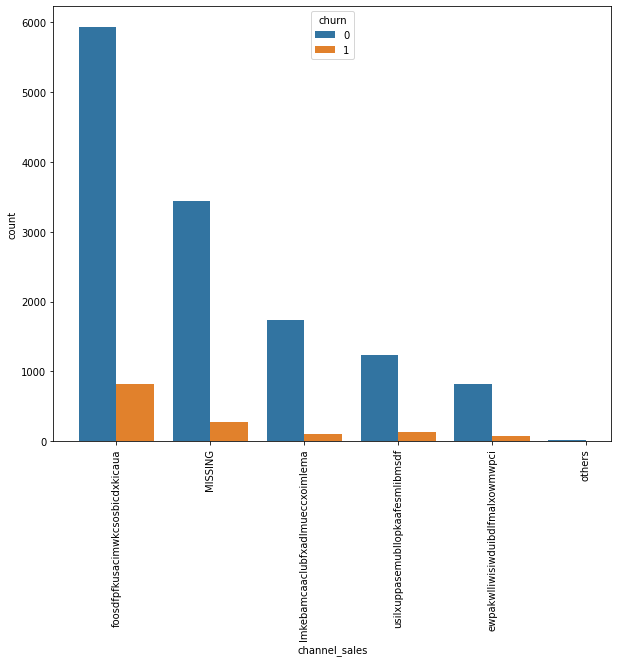

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='channel_sales',hue='churn', data=client_df)
plt.xticks(rotation=90)
plt.plot()

In [35]:
print(client_df['cons_12m'].describe())

count    1.460600e+04
mean     1.592203e+05
std      5.734653e+05
min      0.000000e+00
25%      5.674750e+03
50%      1.411550e+04
75%      4.076375e+04
max      6.207104e+06
Name: cons_12m, dtype: float64


Turning has gas to numerical categorical values

In [36]:
client_df['has_gas'].value_counts()

f    11955
t     2651
Name: has_gas, dtype: int64

In [37]:
client_df.has_gas.replace(('f', 't'), (0,1), inplace=True)

Brand antiquity and value perception: Are customers willing to pay higher prices for older brands

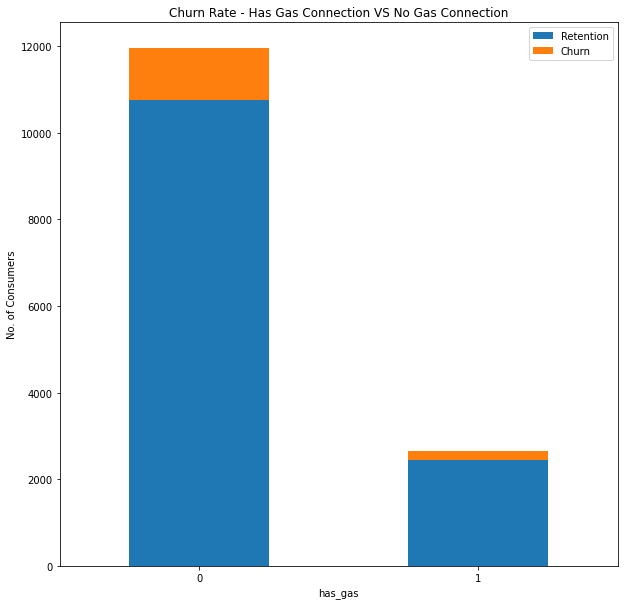

In [38]:
cons_12m = client_df[["has_gas",
               "churn", "id"]].groupby([
    "has_gas","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(10,10),
 stacked=True,
rot=0,
 title= "Churn Rate - Has Gas Connection VS No Gas Connection")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("has_gas")
plt.show()

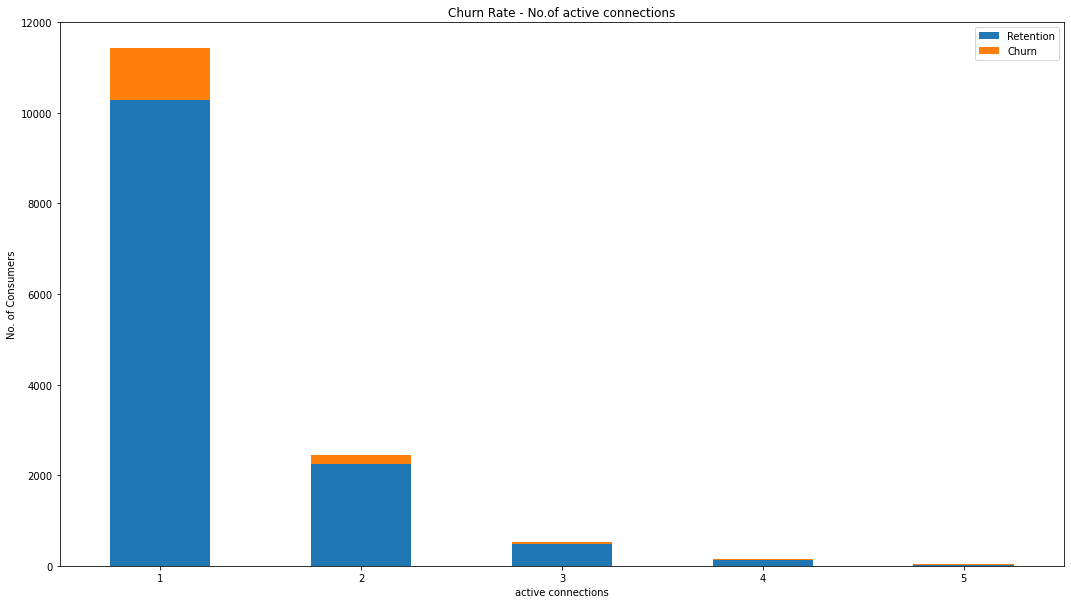

In [39]:
cons_12m = client_df[["nb_prod_act",
               "churn", "id"]].groupby([
    "nb_prod_act","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)[:5]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - No.of active connections")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("active connections")
plt.show()

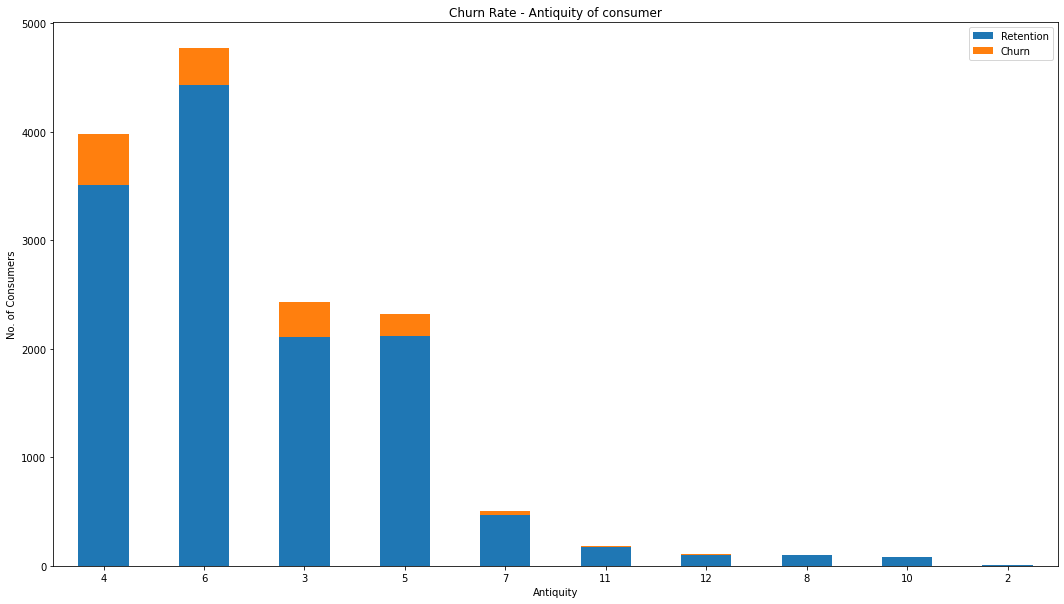

In [40]:
cons_12m = client_df[["num_years_antig",
               "churn", "id"]].groupby([
    "num_years_antig","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)[:10]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - Antiquity of consumer")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("Antiquity")
plt.show()

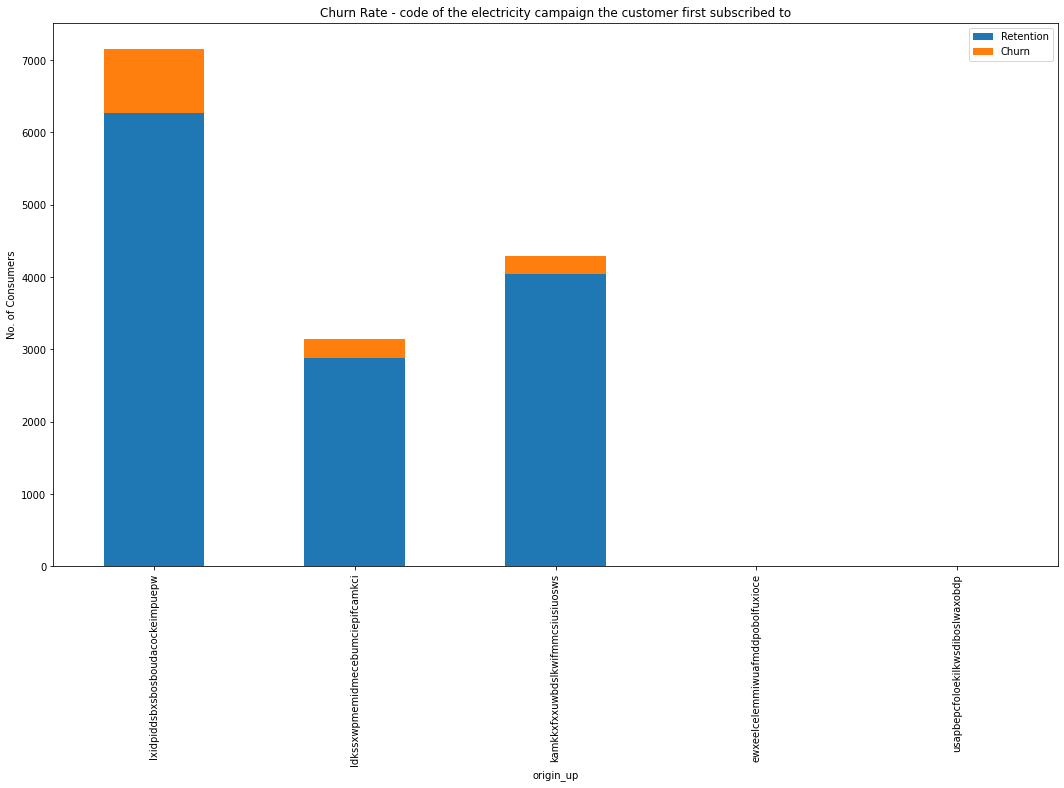

In [41]:
cons_12m = client_df[["origin_up",
               "churn", "id"]].groupby([
    "origin_up","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - code of the electricity campaign the customer first subscribed to")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("origin_up")
plt.xticks(rotation=90)
plt.show()

the most subscribed code is 1st and 3rd

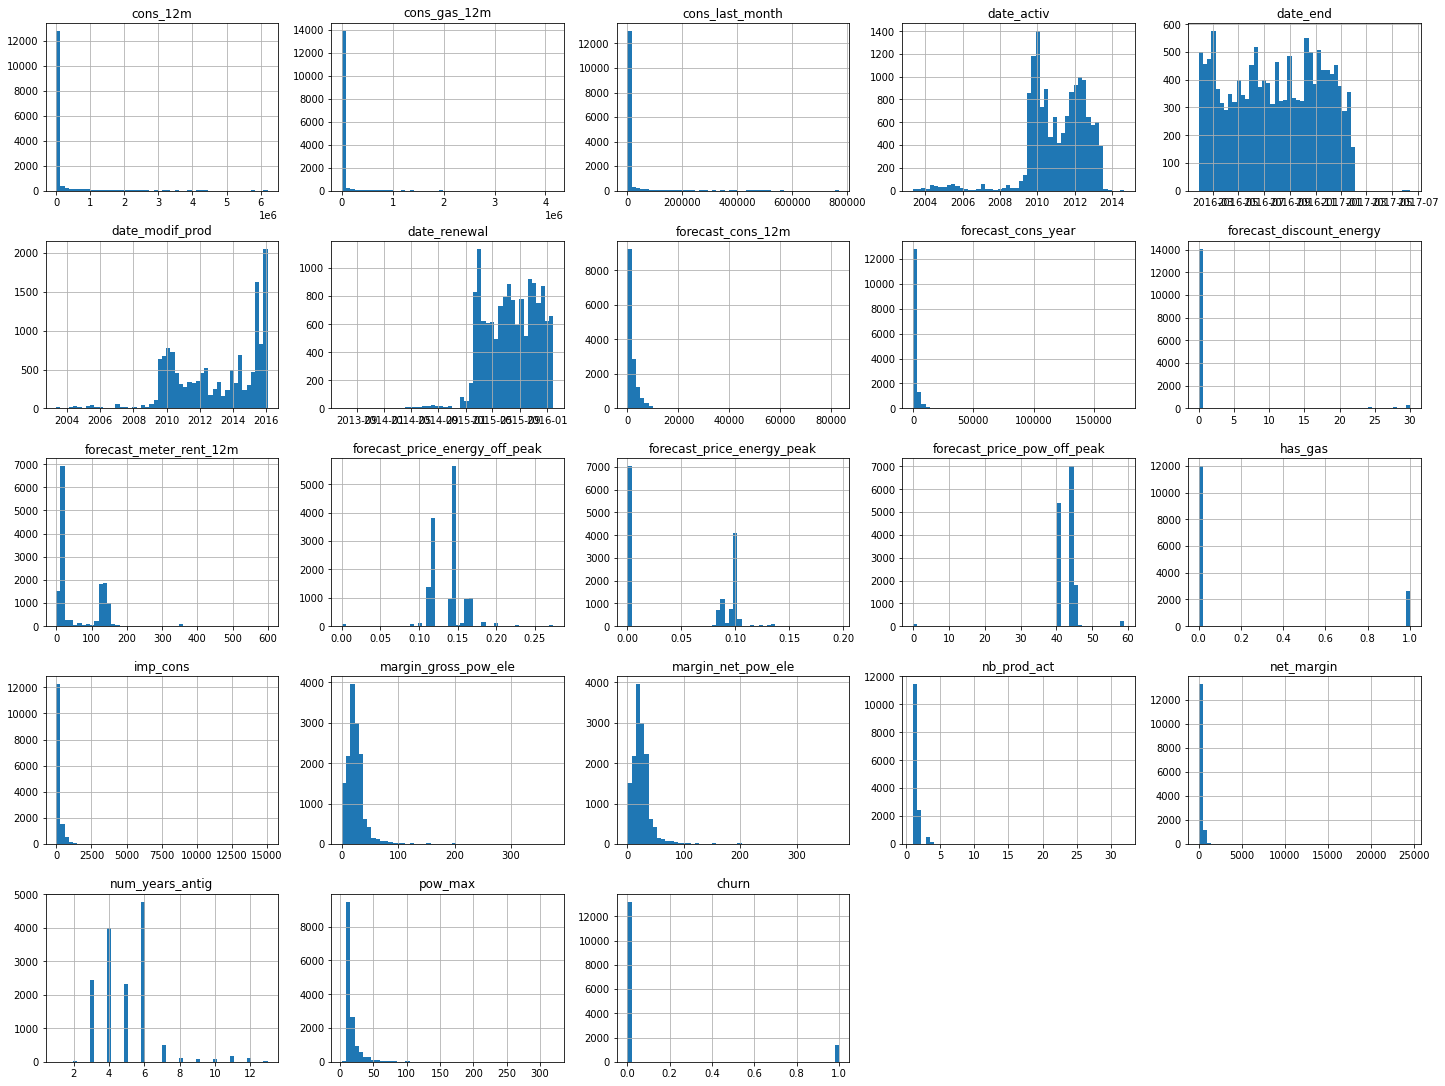

In [42]:
client_df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [43]:
churned = (sum(client_df['churn'])/len(client_df['churn'].index))*100
churned

9.715185540188962

We have almost 10% churn rate

In [44]:
client_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                          Int64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                    Int64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak                Int64
has_gas                                    int64
imp_cons                                   Int64
margin_gross_pow_ele                       Int64
margin_net_pow_ele                         Int64
nb_prod_act         

**Feature Engineering**
Let's build some new features from the exisitng features that might help the model. LEt's start with the current contract's tenure.

In [45]:
client_df['contract_tenure']=client_df['date_end']-client_df['date_activ']
client_df['contract_tenure']=client_df['contract_tenure'].apply(lambda x:x.days)

In [46]:
client_df['contract_tenure'].value_counts()

1461    2451
2557    2401
2192    2203
1827    2069
1096     645
        ... 
2782       1
4454       1
2525       1
1770       1
2579       1
Name: contract_tenure, Length: 1410, dtype: int64

In [47]:
client_df['contract_tenure_year']=client_df['contract_tenure'].apply(lambda x:int(np.round(x/365)))

In [48]:
client_df['contract_tenure_year'].value_counts()

4     3584
6     3420
7     2967
5     2924
3     1055
11     184
12     141
8      122
10      88
9       75
13      45
2        1
Name: contract_tenure_year, dtype: int64

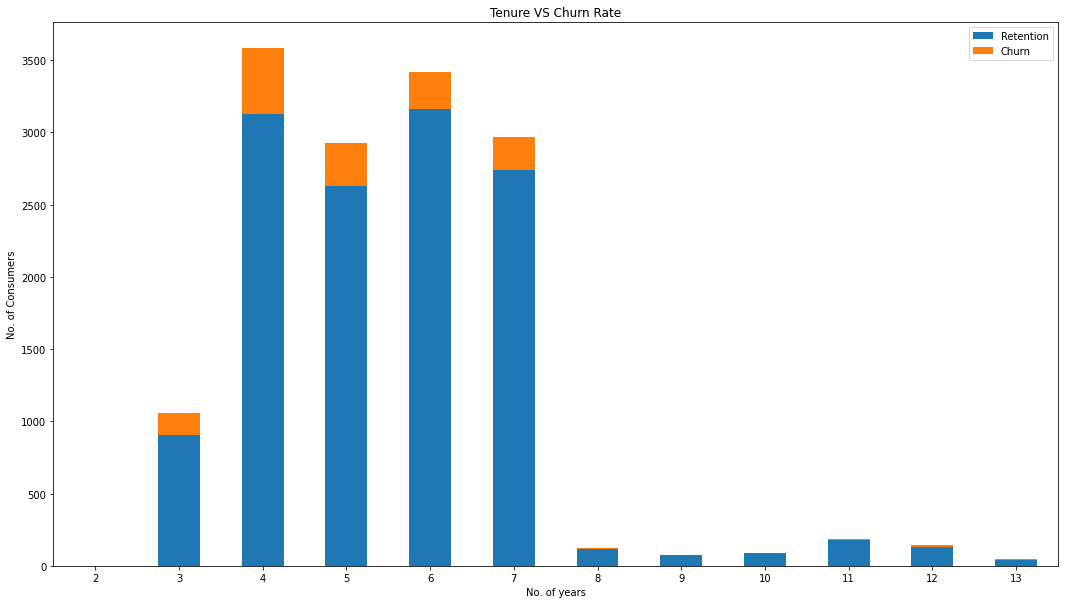

In [49]:
tenure = client_df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

The customers who have tenure of 3 to 7 years are more likely to churn 

Let's calculate the deviation of last month bill from the average of last 12 months.

In [50]:
client_df['bill_dev']=(client_df['cons_12m']/12)-client_df['cons_last_month']

Calculate the ratio of last 12month consumption to next 12 month forecasted consumption

In [51]:
def handleInf(x):
    if x==float('-inf') or x==float('inf'):
        return 0

In [52]:
client_df['cons_pattern']=client_df['forecast_cons_12m']/client_df['cons_12m']
client_df.cons_pattern=client_df.cons_pattern.apply(handleInf)

In [53]:
price_df.shape

(193002, 8)

In [54]:
price_df.head(20)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


In [55]:
(price_df.isna().sum()/price_df.shape[0])*100

id                    0.0
price_date            0.0
price_off_peak_var    0.0
price_peak_var        0.0
price_mid_peak_var    0.0
price_off_peak_fix    0.0
price_peak_fix        0.0
price_mid_peak_fix    0.0
dtype: float64

In [56]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [57]:
price_peak = SimpleImputer(missing_values=np.nan, strategy='mean')

In [58]:
price_df[['price_off_peak_var', 'price_peak_var','price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix','price_mid_peak_fix']]=price_peak.fit_transform(
    price_df[['price_off_peak_var', 'price_peak_var','price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix','price_mid_peak_fix']])

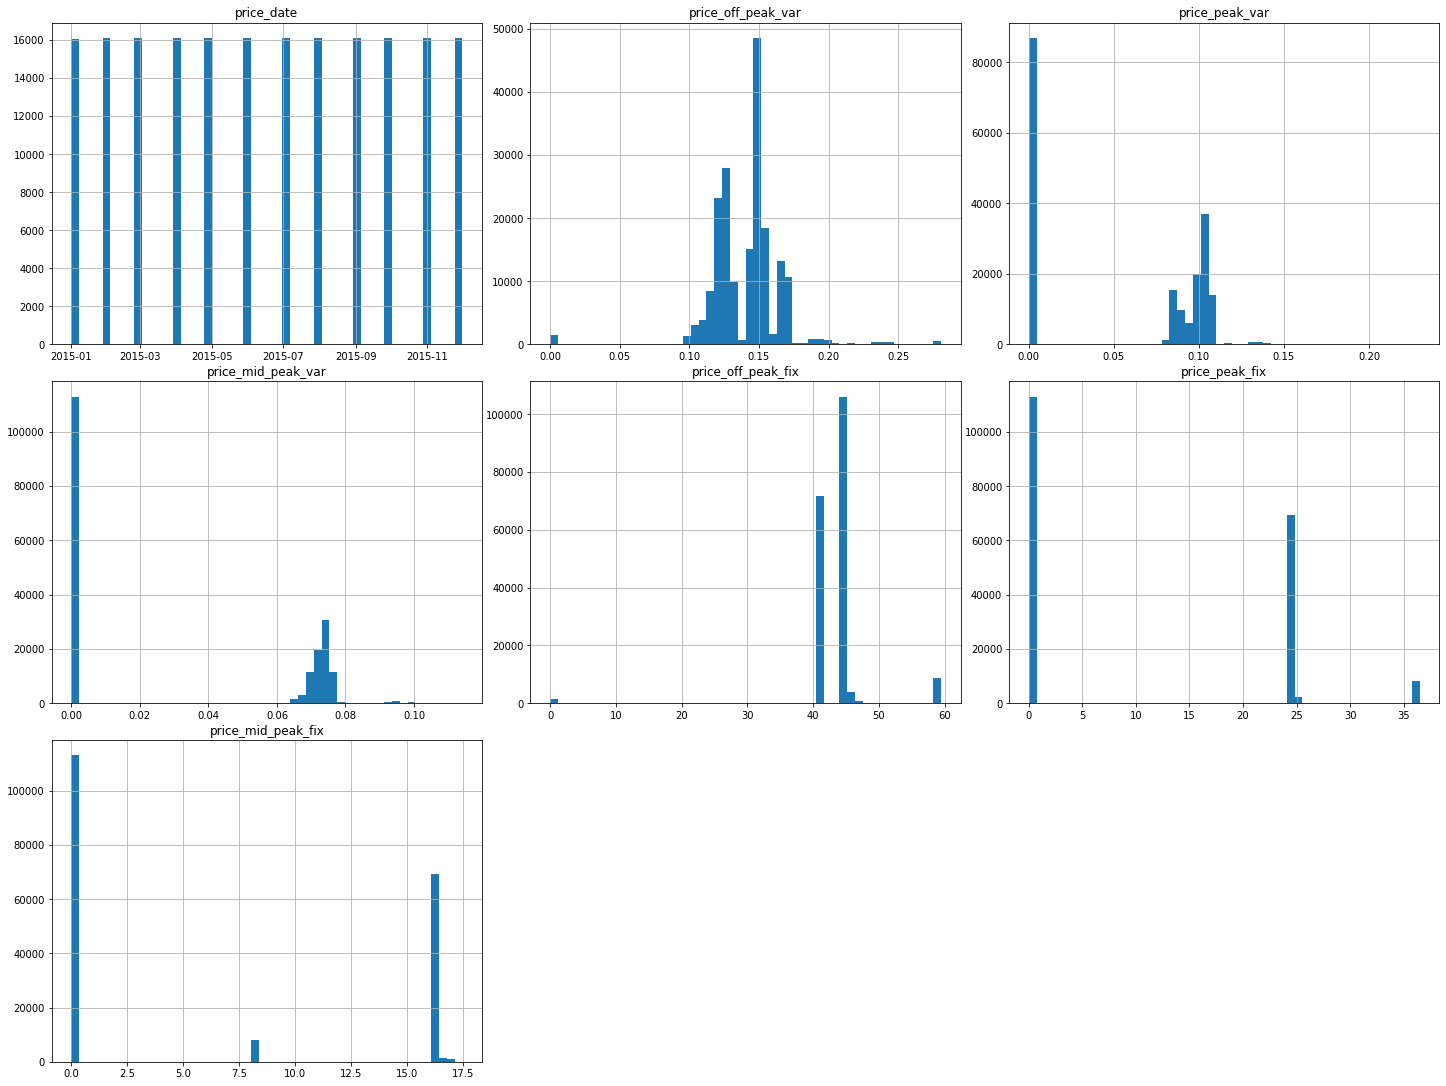

In [59]:
price_df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [60]:
price_df.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

In [61]:
price_df['price_p1']=price_df['price_off_peak_var']+price_df['price_off_peak_fix']
price_df['price_p2']=price_df['price_mid_peak_var']+price_df['price_mid_peak_var']
price_df['price_p3']=price_df['price_peak_var']+price_df['price_peak_fix']

price_df['pp12']=price_df['price_p2']-price_df['price_p1']
price_df['pp23']=price_df['price_p3']-price_df['price_p2']
price_df['pp13']=price_df['price_p3']-price_df['price_p1']

In [62]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'price_p1', 'price_p2', 'price_p3', 'pp12',
       'pp23', 'pp13'],
      dtype='object')

In [63]:
price_df.drop(['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix',],inplace=True,axis=1)

In [64]:
df=pd.merge(client_df, price_df, on=['id'])

In [70]:
price_df.columns

Index(['id', 'price_p1', 'price_p2', 'price_p3', 'pp12', 'pp23', 'pp13'], dtype='object')

## **Modeling & Evaluation**

Now it's time to split the data into Independent and Dependent variables. Lets drop dates and id from the train dataset as we are going to the modelling part where we need only features.

In [65]:
df.fillna(0,inplace=True)
y = df["churn"]
X = df.drop(labels = ["id",'date_activ','date_end','date_modif_prod','date_renewal',"churn"],axis = 1)

In the features, Features channel_sales and origin_up are the two categorical variables. Let's encode them.

In [66]:
X.dtypes

channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
forecast_cons_12m                   Int64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m             Int64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak         Int64
has_gas                             int64
imp_cons                            Int64
margin_gross_pow_ele                Int64
margin_net_pow_ele                  Int64
nb_prod_act                         int64
net_margin                          Int64
num_years_antig                     int64
origin_up                          object
pow_max                             Int64
contract_tenure                     int64
contract_tenure_year                int64
bill_dev                          float64
cons_pattern                      

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [71]:
categorical_cols = [0,18]

In [72]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [73]:
X = np.array(ct.fit_transform(X))

Next we will split the data into training and validation data. The percentages of each test can be changed but a 75%-25% is a good ratio. We also use a random state generator in order to split it randomly.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

In [75]:
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1,use_label_encoder=False)
result = model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


We are going to evaluate our model on our test data (which we did not use for training) using the evalution metrics of:

In [76]:
def evaluate(model_, X_test_, y_test_):
 
 prediction_test_ = model_.predict(X_test_)
 
 results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
 "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
 "Recall" : [metrics.recall_score(y_test_, prediction_test_)]})
 

 return results

In [77]:
evaluate(model, X_test, y_test)

,Accuracy,Precision,Recall
0,0.98479,1.0,0.840822


We can go further and apply K fold cross validation and hyperparameter tuning to improve the model score. 